<a href="https://colab.research.google.com/github/Vikranttyagi95/Fashion-MNIST-Classifier/blob/main/Fashion_MNIST_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the dataset

In [2]:
fmnist_data = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fmnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(X_train_full.shape)
print(y_train_full)

(60000, 28, 28)
[9 0 0 ... 3 0 5]


## Creating a Validation Set

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

In [12]:
X_train.shape

(54000, 28, 28)

## Normalizing the input features

In [13]:
X_train = X_train/255.0
X_valid = X_valid/255.0
X_test = X_test/255.0

## A peak at an output example

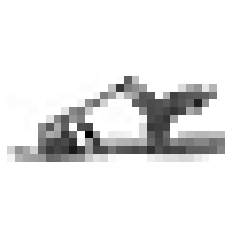

In [15]:
plt.imshow(X_train[4], cmap='binary')
plt.axis('off')
plt.show()

In [16]:
y_train[4]

5

In [17]:
class_names = ["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [18]:
class_names[y_train[4]]

'Sandal'

## Plotting Some example images

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


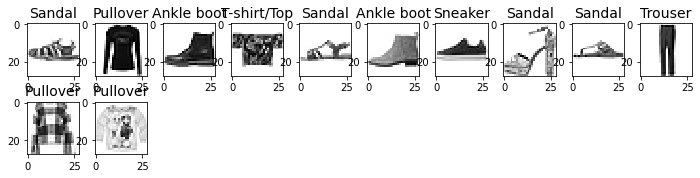

In [19]:
n_rows = 2
n_cols = 10

plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_rows * row + col
    plt.subplot(n_rows, n_cols, index+1)
    plt.imshow(X_train[index], cmap='binary',interpolation='nearest')
    plt.title(class_names[y_train[index]], fontsize=14)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Creating a Model

In [45]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(150, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_10 (Dense)             (None, 150)               30150     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1510      
Total params: 188,660
Trainable params: 188,660
Non-trainable params: 0
_________________________________________________________________


In [31]:
hidden1 = model.layers[1]

In [32]:
weights, biases = hidden1.get_weights()

In [24]:
weights

array([[-0.05960592, -0.07205535, -0.01665654, ...,  0.00579741,
        -0.05653534, -0.04993884],
       [-0.04411693, -0.03453702, -0.05743594, ..., -0.07148175,
         0.01706006,  0.02194314],
       [-0.03655287,  0.01445751,  0.03926075, ...,  0.01798882,
         0.05224365,  0.01507544],
       ...,
       [-0.00527821, -0.00618792,  0.01814166, ..., -0.0702503 ,
        -0.06052341,  0.03341022],
       [ 0.04255588, -0.03320312, -0.03200027, ...,  0.05406391,
         0.00303581,  0.02141093],
       [-0.03468017, -0.01301967, -0.047933  , ...,  0.0035255 ,
        -0.06441922, -0.06285591]], dtype=float32)

In [46]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [47]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.7332 - accuracy: 0.7622 - val_loss: 0.5506 - val_accuracy: 0.8078
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4932 - accuracy: 0.8295 - val_loss: 0.4685 - val_accuracy: 0.8367
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4481 - accuracy: 0.8433 - val_loss: 0.4283 - val_accuracy: 0.8487
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4208 - accuracy: 0.8520 - val_loss: 0.4253 - val_accuracy: 0.8453
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4028 - accuracy: 0.8596 - val_loss: 0.4077 - val_accuracy: 0.8542
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3856 - accuracy: 0.8643 - val_loss: 0.3877 - val_accuracy: 0.8608
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3726 - accuracy: 0.8683 - val_loss: 0.4172 - val_accuracy:

## Plotting loss per iteration

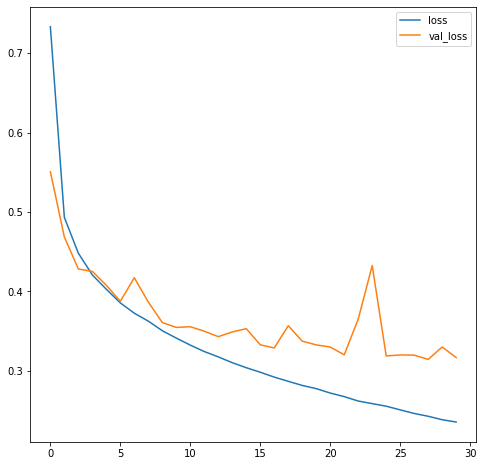

In [48]:
plt.figure(figsize=(8,8))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

## Plotting accuracy per iteration

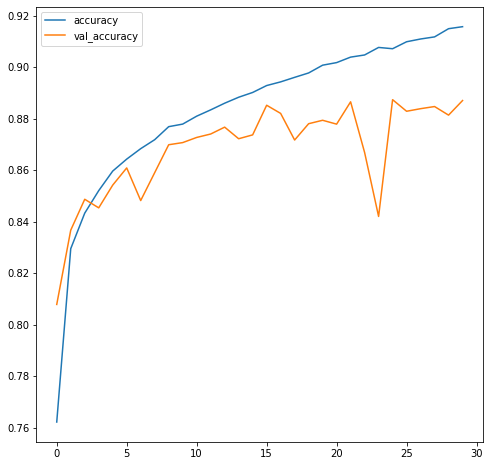

In [49]:
plt.figure(figsize=(8,8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# Evaluating the model on the test set

In [50]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3439 - accuracy: 0.8785


[0.34392815828323364, 0.8784999847412109]

In [52]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [54]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [55]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

# Plotting the predictions

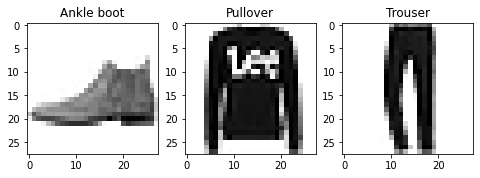

In [56]:
plt.figure(figsize=(8,8))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index+1)
    plt.imshow(image, cmap='binary', interpolation='nearest')
    plt.title(class_names[y_new[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()